# 데이터 분석 프로젝트

In [118]:
import os
import pandas as pd
os.getcwd()

os.listdir("data/raw")
os.listdir()
os.listdir("data/raw/policy")

df = pd.read_csv(
    "data/raw/policy/한국에너지공단_재생에너지 사용 확인제도 참여 현황_20241108.csv",
    encoding="cp949"
)

output = "한국에너지공단_재생에너지 사용 확인제도 참여 현황_20241108.xlsx"
df.to_excel(output, index=False)

print(f"엑셀 파일 : {output}")

엑셀 파일 : 한국에너지공단_재생에너지 사용 확인제도 참여 현황_20241108.xlsx


In [2]:
import pandas as pd
! pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [3]:


import pandas as pd



df = pd.read_csv(
    "data/raw/energy/한국에너지공단_기초지자체별 신재생에너지 보급 현황.csv",
    encoding="cp949"
)


df = df.rename(columns={
    "광역": "광역",
    "기초": "기초",
    "에너지원": "에너지원",
    "보급용량_발전_신규(kW)": "신규설치용량_MW",
    "보급용량_발전_누적(kW)": "누적설치용량_MW",
    "발전량(MWh)": "발전량(MWh)"
})


output = "한국에너지공단_기초지자체별 신재생에너지 보급 현황.xlsx"
df.to_excel(output, index=False)

print(f"엑셀 파일 : {output}")


엑셀 파일 : 한국에너지공단_기초지자체별 신재생에너지 보급 현황.xlsx


In [4]:
! pip install selenium beautifulsoup4 pandas numpy requests lxml

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드 (예시: 기상 데이터와 발전량 데이터가 통합된 csv)
df = pd.read_csv('data/raw/energy/한국에너지공단_기초지자체별 신재생에너지 보급 현황.csv', encoding="cp949")

df.columns

Index(['광역', '기초', '에너지원', '생산량(toe)', '발전량(MWh)', '보급용량_발전_누적(kW)',
       '보급용량_발전_신규(kW)'],
      dtype='object')

C:\Users\dkreh\AppData\Local\Temp\ipykernel_11736\30021174.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_capacity.values, y=city_capacity.index, ax=ax[1], palette='viridis')


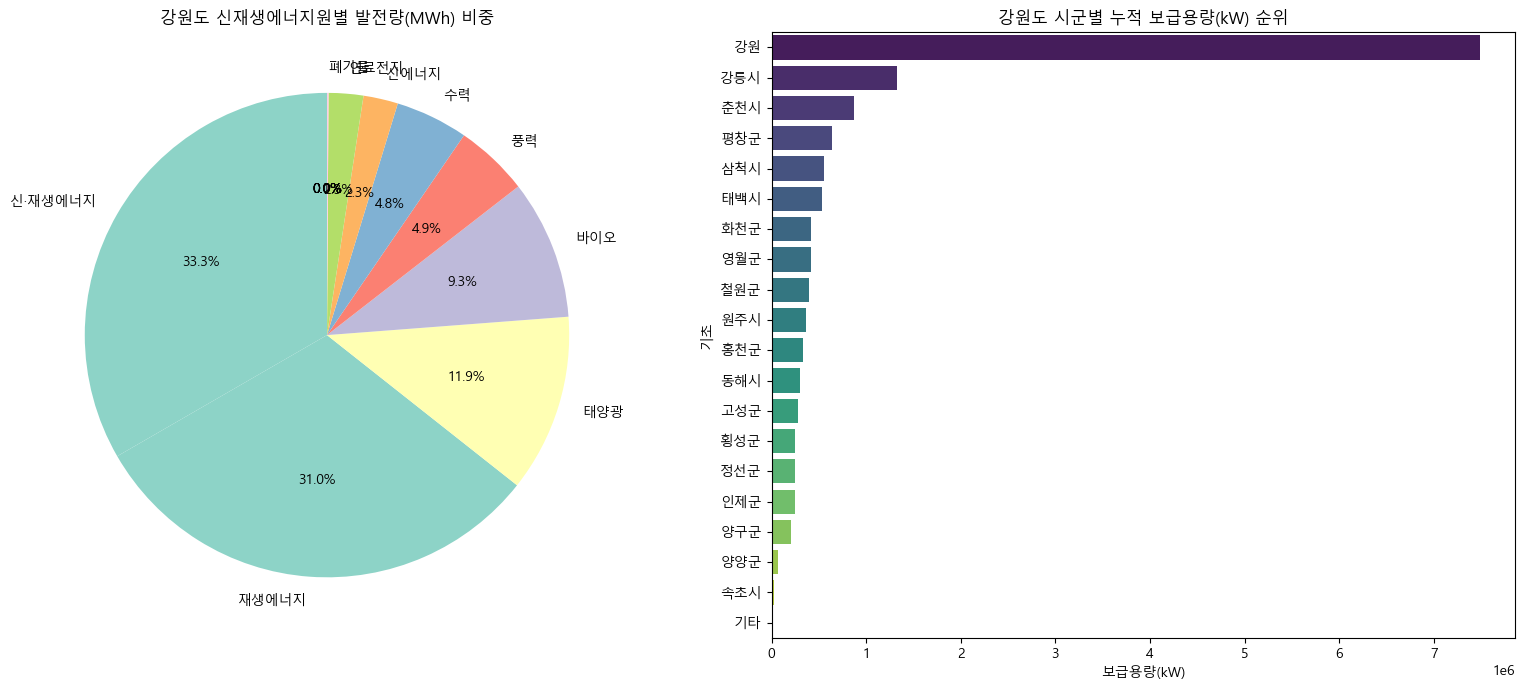

--- 강원도 신재생에너지 분석 요약 ---
총 발전량: 39,065,293 MWh
신규 보급용량 합계: 1,373,900 kW


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드 및 한글 설정
# 파일 경로는 본인의 환경에 맞게 수정하세요.
file_path = 'data/raw/energy/한국에너지공단_기초지자체별 신재생에너지 보급 현황.csv'
df = pd.read_csv(file_path, encoding="cp949")

# 한글 폰트 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 2. 강원도 데이터 필터링
# '광역' 컬럼에서 '강원'이 포함된 행만 추출
df_gw = df[df['광역'].str.contains('강원', na=False)].copy()

# 3. 분석 A: 강원도 내 에너지원별 발전량 비중
source_gen = df_gw.groupby('에너지원')['발전량(MWh)'].sum().sort_values(ascending=False)

# 4. 분석 B: 강원도 기초지자체별(시군별) 누적 보급용량 현황
city_capacity = df_gw.groupby('기초')['보급용량_발전_누적(kW)'].sum().sort_values(ascending=False)

# 5. 시각화 (VS Code에서 바로 확인 가능)
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# 차트 1: 에너지원별 발전량 (Pie Chart)
source_gen.plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90, cmap='Set3')
ax[0].set_title('강원도 신재생에너지원별 발전량(MWh) 비중')
ax[0].set_ylabel('')

# 차트 2: 시군별 누적 보급용량 (Bar Chart)
sns.barplot(x=city_capacity.values, y=city_capacity.index, ax=ax[1], palette='viridis')
ax[1].set_title('강원도 시군별 누적 보급용량(kW) 순위')
ax[1].set_xlabel('보급용량(kW)')

plt.tight_layout()
plt.show()

# 6. 통계 요약 출력
print("--- 강원도 신재생에너지 분석 요약 ---")
print(f"총 발전량: {df_gw['발전량(MWh)'].sum():,.0f} MWh")
print(f"신규 보급용량 합계: {df_gw['보급용량_발전_신규(kW)'].sum():,.0f} kW")